In [1]:
import xarray as xr
import numpy as np
import geopandas as gpd
import datetime
import matplotlib
import pandas as pd
import glob
import matplotlib.pyplot as plt

# getting the spatial plotting function from another directory
import sys
new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfuncs

%run -i drought_2017to2019/dataInfo_and_functions.py

### AWRA and AGCD

In [19]:
precip_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'

agcd_file = 'agcd_monthly_1900_2020.nc'
ds_agcd = xr.open_dataset(precip_dir + agcd_file)

In [20]:
et_dir = '/g/data/w97/ad9701/drought_2017to2020/ET_data/'

awra_file = 'etot_awra_monthly_1911_2022.nc'
ds_awra = xr.open_dataset(et_dir + awra_file)

In [3]:
et_dir = '/g/data/w97/ad9701/drought_2017to2020/ET_data/'

awra_file = 'etot_awra_monthly_1911_2022.nc'
ds_awra = xr.open_dataset(et_dir + awra_file)

lat_new = np.float32(ds_awra['lat'])
lon_new = np.float32(ds_awra['lon'])
ds_awra = ds_awra.assign_coords({'lat': lat_new, 'lon': lon_new})
ds_awra = ds_awra.reindex(lat=ds_awra.lat[::-1])

In [4]:
import pandas as pd
time_new_et = pd.to_datetime(ds_awra['time']).to_period('M').to_timestamp()
ds_awra = ds_awra.assign_coords({'time': time_new_et})

time_new_p = pd.to_datetime(ds_agcd['time']).to_period('M').to_timestamp()
ds_agcd = ds_agcd.assign_coords({'time': time_new_p})

In [12]:
time_slice = slice('1911-01-01', '2020-05-31')
lat_slice = slice(-44, -20)
lon_slice = slice(135, 154)

# to use as a mask to subset the land grids
da_etot_mean = ds_awra['etot'].sel(time = time_slice, lat = lat_slice, lon = lon_slice).mean('time')

da_P_sel = ds_agcd['precip'].sel(time = time_slice, lat = lat_slice, lon = lon_slice)
da_et_sel = ds_awra['etot'].sel(time = time_slice, lat = lat_slice, lon = lon_slice).where(da_etot_mean>0)

da_PminusET = da_P_sel - da_et_sel

attrs_dict = {'precip_file': '/g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_monthly_1900_2020.nc',
             'et_file': '/g/data/w97/ad9701/drought_2017to2020/ET_data/etot_awra_monthly_1911_2022.nc'}

da_PminusET = da_PminusET.rename('PminusET').assign_attrs(attrs_dict)
da_PminusET

#.to_netcdf(main_dir + 'PminusPET/PminusPET_awra_monthly_1911_2020.nc')

<xarray.DataArray 'PminusET' (time: 1313, lat: 481, lon: 381)>
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [ -94.06788513,  -93.05232438, -102.05896993, ...,
                   nan,           nan,           nan],
        [ -96.0314949 ,  -94.79254867,  -97.18686438, ...,
                   nan,           nan,           nan],
        [ -93.76683283,  -94.36434038,  -96.21366414, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
...
        [ -11.39492727,  -11.44668881,  -11.9228357 , ...,
                   nan,           nan,           nan],
        [ -11.00904623,  -11.53593363,  -11.76864262, ...,
                   nan,           nan,           nan],
        [ -11.24978107,  -11.52163251,  -12.13596679, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [   3.62515115,    2.93038267,    2.49536626, ...,
                   nan,           nan,           nan],
        [   3.62195116,    2.75130027,    2.11174388, ...,
                   nan,           nan,           nan],
        [   2.98651711,    2.44994522,    1.39229081, ...,
                   nan,           nan,           nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1911-01-01 1911-02-01 ... 2020-05-01
  * lat      (lat) float32 -44.0 -43.95 -43.9 -43.85 ... -20.1 -20.05 -20.0
  * lon      (lon) float32 135.0 135.1 135.1 135.1 ... 153.9 153.9 153.9 154.0
Attributes:
    precip_file:  /g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_mont...
    et_file:      /g/data/w97/ad9701/drought_2017to2020/ET_data/etot_awra_mon...

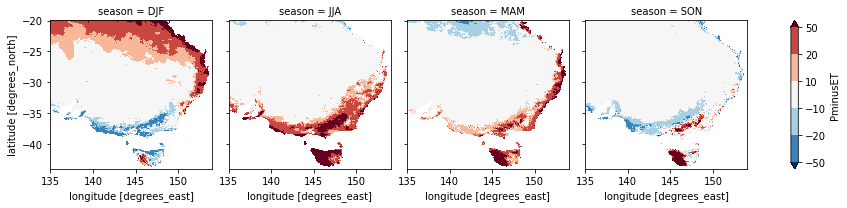

In [16]:
da_PminusET.groupby('time.season').mean('time').plot(col='season', col_wrap=4, levels=[-50, -20, -10, 10, 20, 50])

In [27]:
# assign back the time co-ordinates of the agcd data

precip_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'

agcd_file = 'agcd_monthly_1900_2020.nc'
ds_agcd = xr.open_dataset(precip_dir + agcd_file)
time_array = ds_agcd.sel(time = time_slice).time.values
da_PminusET = da_PminusET.assign_coords({'time': time_array})
da_PminusET

<xarray.DataArray 'PminusET' (time: 1313, lat: 481, lon: 381)>
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [ -94.06788513,  -93.05232438, -102.05896993, ...,
                   nan,           nan,           nan],
        [ -96.0314949 ,  -94.79254867,  -97.18686438, ...,
                   nan,           nan,           nan],
        [ -93.76683283,  -94.36434038,  -96.21366414, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
...
        [ -11.39492727,  -11.44668881,  -11.9228357 , ...,
                   nan,           nan,           nan],
        [ -11.00904623,  -11.53593363,  -11.76864262, ...,
                   nan,           nan,           nan],
        [ -11.24978107,  -11.52163251,  -12.13596679, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [   3.62515115,    2.93038267,    2.49536626, ...,
                   nan,           nan,           nan],
        [   3.62195116,    2.75130027,    2.11174388, ...,
                   nan,           nan,           nan],
        [   2.98651711,    2.44994522,    1.39229081, ...,
                   nan,           nan,           nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1911-01-16 1911-02-14T12:00:00 ... 2020-05-16
  * lat      (lat) float32 -44.0 -43.95 -43.9 -43.85 ... -20.1 -20.05 -20.0
  * lon      (lon) float32 135.0 135.1 135.1 135.1 ... 153.9 153.9 153.9 154.0
Attributes:
    precip_file:  /g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_mont...
    et_file:      /g/data/w97/ad9701/drought_2017to2020/ET_data/etot_awra_mon...

In [28]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/'
out_file = 'PminusET_agcd_awra_monthly_1911_2020.nc'


da_PminusET.to_netcdf(out_dir + out_file)

### Regavg

In [42]:
# read mask from saved files
mask_file = '/g/data/w97/ad9701/drought_2017to2020/AGCD_mask_drought_focusArea.nc'
ds_agcd_mask = xr.open_dataset(mask_file)
da_agcd_mask = ds_agcd_mask['mask']

da_PminusET_masked = da_PminusET*da_agcd_mask
da_PminusET_regAvg = myfuncs.calc_areaAvg(da_PminusET_masked)

In [39]:
da_PminusET_regAvg = da_PminusET_regAvg.rename('PminusET').assign_attrs(da_PminusET.attrs)
da_PminusET_regAvg

<xarray.DataArray (time: 1313)>
array([ 46.94254787,  20.58349023, -34.95208669, ...,   2.72494015,
         4.75060422,  -8.85708201])
Coordinates:
  * time     (time) datetime64[ns] 1911-01-16 1911-02-14T12:00:00 ... 2020-05-16
Attributes:
    precip_file:  /g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_mont...
    et_file:      /g/data/w97/ad9701/drought_2017to2020/ET_data/etot_awra_mon...

In [41]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/drought_focusRegavg/'
da_PminusET_regAvg.to_netcdf(out_dir + out_file)

### GLEAM & MSWEP

In [4]:
precip_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
mswep_file = 'precipitation_mswep_monthly_1979_2021.nc'
ds_mswep = xr.open_dataset(precip_dir + mswep_file)

et_dir = '/g/data/w97/ad9701/drought_2017to2020/ET_data/'
gleam_file = 'E_gleam_monthly_1980_2020.nc'
ds_gleam = xr.open_dataset(et_dir + gleam_file)

In [5]:
# regrid mswep to gleamm resolution
lat = ds_gleam.lat.values
lon = ds_gleam.lon.values

import xesmf as xe
ds_out = xr.Dataset({"lat": (["lat"], lat), "lon": (["lon"], lon),})
regridder = xe.Regridder(ds_mswep['precipitation'], ds_out, 'bilinear')
da_mswep_regrid = regridder(ds_mswep['precipitation'])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


In [6]:
time_slice = slice('1980-01-01', '2020-12-31')
lat_slice = slice(-20, -44)
lon_slice = slice(135, 154)

da_P_sel_temp = da_mswep_regrid.sel(time = time_slice, lat = lat_slice, lon = lon_slice)
time_new_p = pd.to_datetime(da_P_sel_temp['time']).to_period('M').to_timestamp()
da_P_sel = da_P_sel_temp.assign_coords({'time': time_new_p})

da_et_sel_temp = ds_gleam['E'].sel(time = time_slice, lat = lat_slice, lon = lon_slice)
time_new_et = pd.to_datetime(da_et_sel_temp['time']).to_period('M').to_timestamp()
da_et_sel = da_et_sel_temp.assign_coords({'time': time_new_et})

da_PminusET = da_P_sel - da_et_sel

attrs_dict = {'precip_file': precip_dir + mswep_file,
              'precip_regrid': 'bilinear',
             'et_file': et_dir + gleam_file}

da_PminusET = da_PminusET.rename('PminusET').assign_attrs(attrs_dict)
# use the gleam time array
time_array = da_et_sel_temp.time.values
da_PminusET = da_PminusET.assign_coords({'time': time_array})

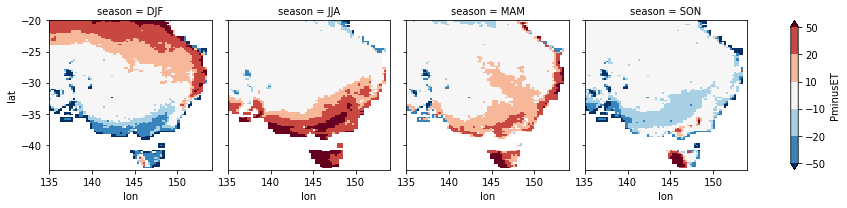

In [8]:
da_PminusET.groupby('time.season').mean('time').plot(x='lon', y='lat', col='season', col_wrap=4, levels=[-50, -20, -10, 10, 20, 50])

In [10]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/'
out_file = 'PminusET_mswep_gleam_monthly_1980_2020.nc'
da_PminusET.to_netcdf(out_dir + out_file)

### Regavg

In [16]:
# forgot to add units in the spatial files
in_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/'
in_file = 'PminusET_agcd_awra_monthly_1911_2020.nc'
ds = xr.open_dataset(in_dir + in_file)
da_attrs = ds['PminusET'].attrs
da_attrs.update({'units': 'mm/month'})
ds['PminusET'] = ds['PminusET'].assign_attrs(da_attrs)

In [22]:
ds.to_netcdf(in_dir + in_file)

In [11]:
# read mask from saved files
mask_file = '/g/data/w97/ad9701/drought_2017to2020/GLEAM_mask_drought_focusArea.nc'
ds_mask = xr.open_dataset(mask_file)
da_mask = ds_mask['mask']

da_PminusET_masked = da_PminusET*da_mask
da_PminusET_regAvg = myfuncs.calc_areaAvg(da_PminusET_masked)
da_PminusET_regAvg = da_PminusET_regAvg.rename('PminusET').assign_attrs(da_PminusET.attrs)

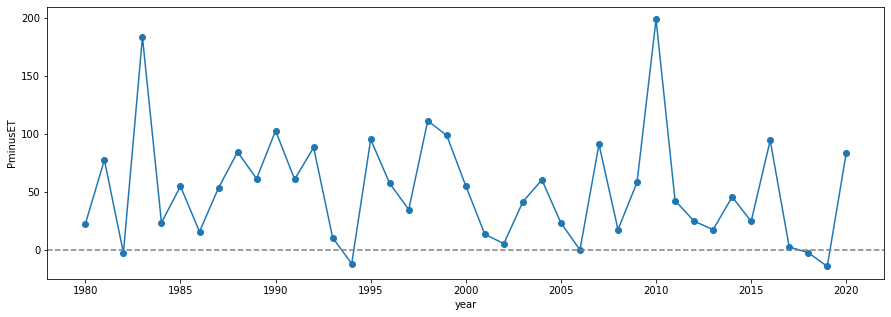

In [22]:
import matplotlib.pyplot as plt
da_PminusET_regAvg.groupby('time.year').sum().plot(size=5, aspect=3, marker="o")
plt.axhline(0, color='grey', linestyle='--')

In [24]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/drought_focusRegavg/'
da_PminusET_regAvg.to_netcdf(out_dir + out_file)

### ERA5Land

#### total precipitation tp: monthly averaged data with units = m/day. Calculated monthly totals from averages.

In [4]:
era5land_dir = '/g/data/zz93/era5-land/monthly-averaged/'

tp_files = glob.glob(era5land_dir + 'tp/*/tp_era5-land_moda_sfc_*.nc')
ds_tp = xr.open_mfdataset(tp_files)
ds_tp

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 866)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-02-01
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(1, 1801, 3600), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-30 11:58:20 UTC+1100 by era5_replication_tools-1.10...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 land monthly-averaged total_precipitation 19500101-195...

In [5]:
# create an array containing the number of days in each month to multiple

time_array = pd.date_range(start = '1950-01-01', end = '2022-02-28').to_numpy()
da_daily_time = xr.DataArray(
    data=time_array,
    dims=["time"],
    coords=dict(time=(["time"], time_array)))

# count the days and assign time coordinate from the monthly average data (can be used for multiplication without problems later)
da_dayCount_inMon = da_daily_time.resample(time="M").count().assign_coords({'time': ds_tp.time.values})

In [21]:
lat_slice = slice(-20, -44)
lon_slice = slice(135, 154)
latlon_rename = {'latitude': 'lat', 'longitude': 'lon'}

ds_tp_inmm = (ds_tp.rename(latlon_rename).sel(lat = lat_slice, lon = lon_slice)*1000)*da_dayCount_inMon

# data array attributes
tp_attrs = ds_tp['tp'].attrs
tp_attrs.update({'units': 'mm/month'})
ds_tp_inmm['tp'] = ds_tp_inmm['tp'].assign_attrs(tp_attrs)

# dataset attributes
ds_attrs = ds_tp.attrs
ds_attrs.update({'history': ds_attrs['history'] + '; anjana calculated monthly totals from averages'})
ds_tp_inmm = ds_tp_inmm.assign_attrs(ds_attrs)

In [23]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_file = 'era5land_monthly_1950_2022.nc'
ds_tp_inmm.to_netcdf(out_dir + out_file)

#### evaporation e: monthly averaged data with units = m/day. Calculated monthly totals from averages.

In [26]:
era5land_dir = '/g/data/zz93/era5-land/monthly-averaged/'

e_files = glob.glob(era5land_dir + 'e/*/e_era5-land_moda_sfc_*.nc')
ds_e = xr.open_mfdataset(e_files)
ds_e

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 866)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-02-01
Data variables:
    e          (time, latitude, longitude) float32 dask.array<chunksize=(1, 1801, 3600), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-30 11:58:20 UTC+1100 by era5_replication_tools-1.10...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 land monthly-averaged total_evaporation 19500101-19500131

In [27]:
lat_slice = slice(-20, -44)
lon_slice = slice(135, 154)
latlon_rename = {'latitude': 'lat', 'longitude': 'lon'}

ds_e_inmm = (ds_e.rename(latlon_rename).sel(lat = lat_slice, lon = lon_slice)*1000*-1)*da_dayCount_inMon

# data array attributes
e_attrs = ds_e['e'].attrs
e_attrs.update({'units': 'mm/month'})
ds_e_inmm['e'] = ds_e_inmm['e'].assign_attrs(e_attrs)

# dataset attributes
ds_attrs = ds_e.attrs
ds_attrs.update({'history': ds_attrs['history'] + '; anjana calculated monthly totals from averages'})
ds_e_inmm = ds_e_inmm.assign_attrs(ds_attrs)

In [32]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/ET_data/'
out_file = 'e_era5land_monthly_1950_2022.nc'
ds_e_inmm.to_netcdf(out_dir + out_file)

In [40]:
da_PminusET = ds_tp_inmm['tp'] - ds_e_inmm['e']

attrs_dict = {'precip_file': '/g/data/w97/ad9701/drought_2017to2020/precip_data/era5land_monthly_1950_2022.nc',
             'et_file': '/g/data/w97/ad9701/drought_2017to2020/ET_data/e_era5land_monthly_1950_2022.nc',
              'units': 'mm/month'}

da_PminusET = da_PminusET.rename('PminusET').assign_attrs(attrs_dict)
out_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/'
out_file = 'PminusET_era5land_monthly_1950_2022.nc'
da_PminusET.to_netcdf(out_dir + out_file)

### Regavg

In [41]:
# read mask from saved files
mask_file = '/g/data/w97/ad9701/drought_2017to2020/ERA5Land_mask_drought_focusArea.nc'
ds_mask = xr.open_dataset(mask_file)
da_mask = ds_mask['mask']

da_PminusET_masked = da_PminusET*da_mask
da_PminusET_regAvg = myfuncs.calc_areaAvg(da_PminusET_masked)
da_PminusET_regAvg = da_PminusET_regAvg.rename('PminusET').assign_attrs(da_PminusET.attrs)

out_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/drought_focusRegavg/'
da_PminusET_regAvg.to_netcdf(out_dir + out_file)

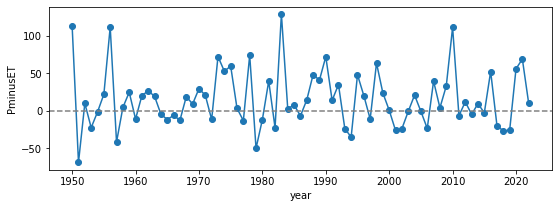

In [46]:
da_PminusET_regAvg.groupby('time.year').sum().plot(size=3, aspect=3, marker="o")
plt.axhline(0, color='grey', linestyle='--')

#### Reconciling differences between daily and monthly ERA5Land datasets

Example: The differences are because data on 2020-01-01:T00 is actually the data accumulation on 2019-12-31T:00. So there would be a one day shift in monthly totals calculated from daily totals using xarray resample vs. the monthly averages provided with the dataset

In [31]:
ds_sample_e = xr.open_dataset(era5land_dir + 'e/2020/e_era5-land_moda_sfc_20200101-20200131.nc')

In [38]:
ds_sample_e['e']

<xarray.DataArray 'e' (time: 1, latitude: 1801, longitude: 3600)>
[6483600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2020-01-01
Attributes:
    units:          m of water equivalent
    long_name:      Evaporation
    standard_name:  lwe_thickness_of_water_evaporation_amount

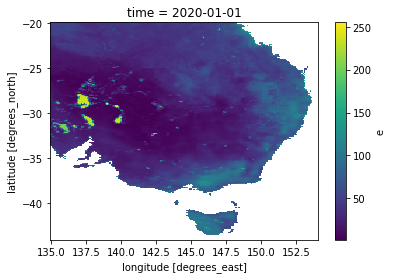

In [36]:
(ds_sample_e['e'].sel(latitude = lat_slice, longitude = lon_slice)*1000*31*-1).plot()

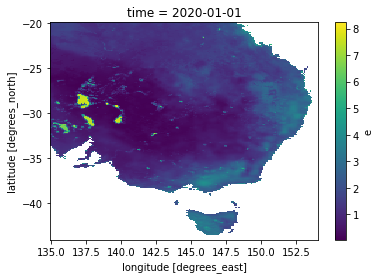

In [63]:
(ds_sample_e['e'].sel(latitude = lat_slice, longitude = lon_slice)*1000*-1).plot()

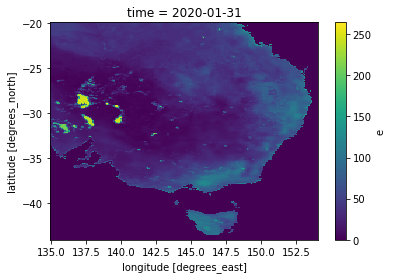

In [41]:
ds_e_saved = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/ET_data/e_era5land_monthly_1981_2021.nc')
ds_e_saved['e'].sel(lat = lat_slice, lon = lon_slice, time = '2020-01').plot()

In [52]:
ds_e_saved.time.values

array(['1981-01-31T00:00:00.000000000', '1981-02-28T00:00:00.000000000',
       '1981-03-31T00:00:00.000000000', '1981-04-30T00:00:00.000000000',
       '1981-05-31T00:00:00.000000000', '1981-06-30T00:00:00.000000000',
       '1981-07-31T00:00:00.000000000', '1981-08-31T00:00:00.000000000',
       '1981-09-30T00:00:00.000000000', '1981-10-31T00:00:00.000000000',
       '1981-11-30T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-01-31T00:00:00.000000000', '1982-02-28T00:00:00.000000000',
       '1982-03-31T00:00:00.000000000', '1982-04-30T00:00:00.000000000',
       '1982-05-31T00:00:00.000000000', '1982-06-30T00:00:00.000000000',
       '1982-07-31T00:00:00.000000000', '1982-08-31T00:00:00.000000000',
       '1982-09-30T00:00:00.000000000', '1982-10-31T00:00:00.000000000',
       '1982-11-30T00:00:00.000000000', '1982-12-31T00:00:00.000000000',
       '1983-01-31T00:00:00.000000000', '1983-02-28T00:00:00.000000000',
       '1983-03-31T00:00:00.000000000', '1983-04-30

In [88]:
latlon_rename = {'latitude': 'lat', 'longitude': 'lon'}
da_temp = (ds_sample_e['e'].sel(latitude = lat_slice, longitude = lon_slice)*1000*-1*31).rename(latlon_rename).drop('time')
da_temp.load()

<xarray.DataArray 'e' (time: 1, lat: 241, lon: 191)>
array([[[54.8138  , 54.648354, 54.95857 , ...,       nan,       nan,
               nan],
        [52.34863 , 53.52331 , 54.49532 , ...,       nan,       nan,
               nan],
        [51.28563 , 52.443768, 53.949337, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 135.0 135.1 135.2 135.3 ... 153.7 153.8 153.9 154.0
  * lat      (lat) float32 -20.0 -20.1 -20.2 -20.3 ... -43.7 -43.8 -43.9 -44.0
Dimensions without coordinates: time

In [67]:
da_temp_saved = (ds_e_saved['e'].sel(lat = lat_slice, lon = lon_slice, time = '2020-01')/30).drop('time')
da_temp_saved.load()

<xarray.DataArray 'e' (time: 1, lat: 241, lon: 191)>
array([[[1.6911218, 1.6801984, 1.6844766, ..., 0.       , 0.       ,
         0.       ],
        [1.61381  , 1.6459979, 1.671338 , ..., 0.       , 0.       ,
         0.       ],
        [1.5773944, 1.6133416, 1.6569718, ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 135.0 135.1 135.2 135.3 ... 153.7 153.8 153.9 154.0
  * lat      (lat) float32 -20.0 -20.1 -20.2 -20.3 ... -43.7 -43.8 -43.9 -44.0
Dimensions without coordinates: time

In [57]:
ds_e_saved['e'].sel(lat = lat_slice, lon = lon_slice, time = '2020-01')

<xarray.DataArray 'e' (time: 1, lat: 241, lon: 191)>
array([[[50.733654, 50.405952, ...,  0.      ,  0.      ],
        [48.4143  , 49.379936, ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-31
  * lon      (lon) float32 135.0 135.1 135.2 135.3 ... 153.7 153.8 153.9 154.0
  * lat      (lat) float32 -20.0 -20.1 -20.2 -20.3 ... -43.7 -43.8 -43.9 -44.0

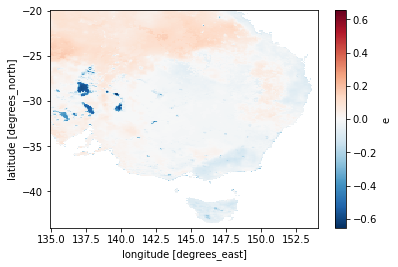

In [68]:
(da_temp - da_temp_saved).plot()

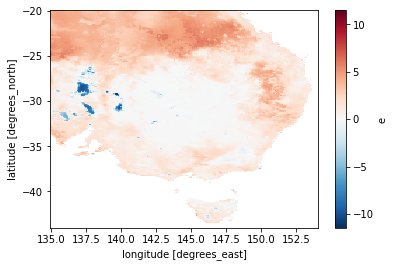

In [62]:
(da_temp - da_temp_saved).plot()

In [70]:
ds_e_daily = xr.open_mfdataset('/g/data/w97/ad9701/p_prob_analysis/era5-land_daily/e/e_era5-land_oper_sfc_20200101_20200131.nc')
ds_e_daily

<xarray.Dataset>
Dimensions:    (longitude: 421, latitude: 341, time: 31)
Coordinates:
  * longitude  (longitude) float32 112.0 112.1 112.2 112.3 ... 153.8 153.9 154.0
  * latitude   (latitude) float32 -10.0 -10.1 -10.2 -10.3 ... -43.8 -43.9 -44.0
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-01-31
Data variables:
    e          (time, latitude, longitude) float32 dask.array<chunksize=(31, 341, 421), meta=np.ndarray>

In [85]:
file_names = ['/g/data/w97/ad9701/p_prob_analysis/era5-land_daily/e/e_era5-land_oper_sfc_20200101_20200131.nc',
              '/g/data/w97/ad9701/p_prob_analysis/era5-land_daily/e/e_era5-land_oper_sfc_20200201_20200229.nc']
ds_e_daily_longer = xr.open_mfdataset(file_names)
ds_e_daily_longer.time.values

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

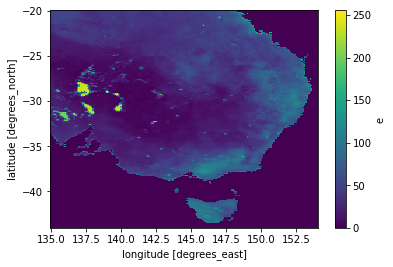

In [92]:
daily_time_slice = slice('2020-01-02', '2020-02-01')
da_daily_temp = ds_e_daily_longer['e'].sel(latitude = lat_slice, longitude = lon_slice, time = daily_time_slice).rename(latlon_rename).sum('time')
da_daily_temp.load()
da_daily_temp.plot()

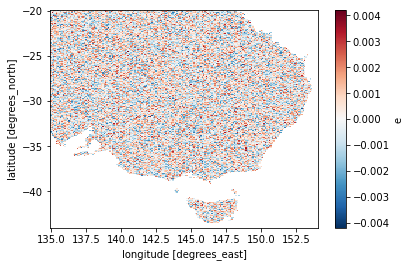

In [93]:
(da_temp - da_daily_temp).plot()

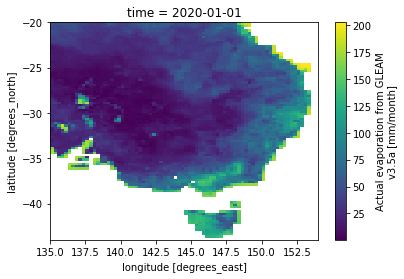

In [35]:
da_et_sel.sel(time='2020-01', lat=lat_slice, lon=lon_slice).plot(x='lon', y='lat')

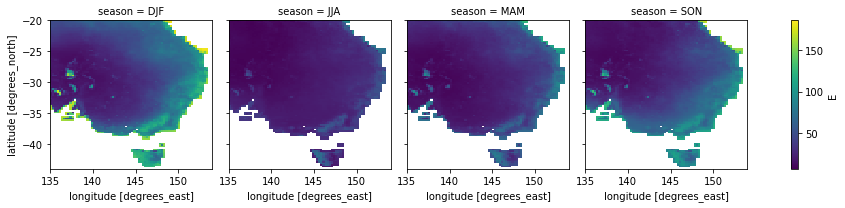

In [18]:
time_slice = slice('1980-01-01', '2020-12-31')
lat_slice = slice(-20, -44)
lon_slice = slice(135, 154)

ds_gleam['E'].sel(time = time_slice, lat = lat_slice, lon = lon_slice).groupby('time.season').mean('time').plot(x='lon', y='lat', col='season', col_wrap=4)

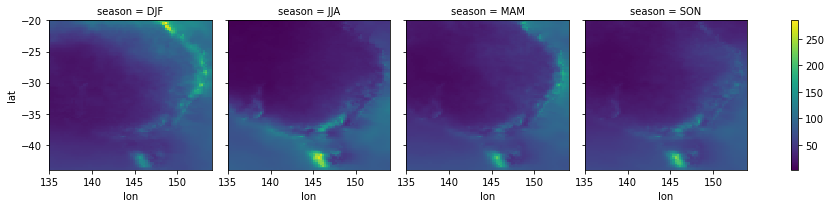

In [19]:
da_mswep_regrid.sel(time = time_slice, lat = lat_slice, lon = lon_slice).groupby('time.season').mean('time').plot(x='lon', y='lat', col='season', col_wrap=4)

In [9]:
ds_temp = xr.open_dataset('/g/data/fj4/SatellitePrecip/MSWEP_V280/Past/Monthly/201801.nc')
ds_temp.time.values

array(['2018-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
len(ds_gleam.lat.values == lat)

136

In [10]:
np.unique(np.diff(ds_mswep.lon.values))

array([0.09997559, 0.1000061 ], dtype=float32)

In [11]:
np.unique(np.diff(ds_gleam.lon.values))

array([0.25])

### Scratch Space

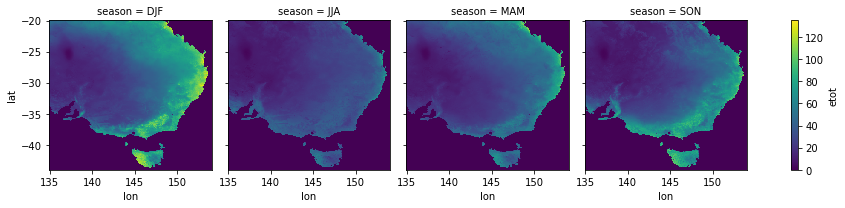

In [8]:
ds_awra['etot'].sel(time = time_slice, lat = lat_slice, lon = lon_slice).groupby('time.season').mean('time').plot(col='season', col_wrap=4)

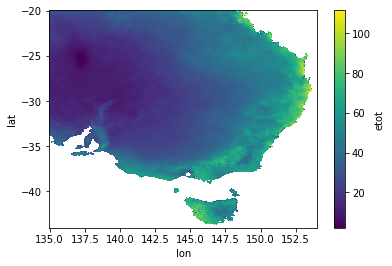

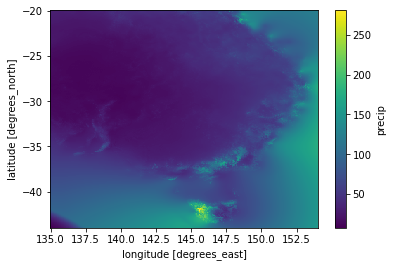

In [15]:
da_P_sel.mean('time').plot()

In [24]:
da_PminusET

<xarray.DataArray 'PminusET' (time: 1313, lat: 481, lon: 381)>
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [ -94.06788513,  -93.05232438, -102.05896993, ...,
                   nan,           nan,           nan],
        [ -96.0314949 ,  -94.79254867,  -97.18686438, ...,
                   nan,           nan,           nan],
        [ -93.76683283,  -94.36434038,  -96.21366414, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
...
        [ -11.39492727,  -11.44668881,  -11.9228357 , ...,
                   nan,           nan,           nan],
        [ -11.00904623,  -11.53593363,  -11.76864262, ...,
                   nan,           nan,           nan],
        [ -11.24978107,  -11.52163251,  -12.13596679, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [   3.62515115,    2.93038267,    2.49536626, ...,
                   nan,           nan,           nan],
        [   3.62195116,    2.75130027,    2.11174388, ...,
                   nan,           nan,           nan],
        [   2.98651711,    2.44994522,    1.39229081, ...,
                   nan,           nan,           nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1911-01-01 1911-02-01 ... 2020-05-01
  * lat      (lat) float32 -44.0 -43.95 -43.9 -43.85 ... -20.1 -20.05 -20.0
  * lon      (lon) float32 135.0 135.1 135.1 135.1 ... 153.9 153.9 153.9 154.0
Attributes:
    precip_file:  /g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_mont...
    et_file:      /g/data/w97/ad9701/drought_2017to2020/ET_data/etot_awra_mon...

In [26]:
len(time_array)

1313